In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')


In [4]:
column_names = ['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('data/WISDM_ar_v1.1_raw.txt', sep=',', names=column_names, on_bad_lines='skip')
df.dropna()
df['z-axis'] = df['z-axis'].str.strip(';').astype(float)

In [5]:
df_33 = df[df['user'] == 33]

In [7]:
df_33

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
467619,33,Sitting,774582347000,5.860000,2.180000,7.740000
467620,33,Sitting,774632335000,6.020000,2.410000,7.890000
467621,33,Sitting,774682292000,5.860000,2.410000,7.780000
467622,33,Sitting,774732310000,5.710000,2.300000,7.780000


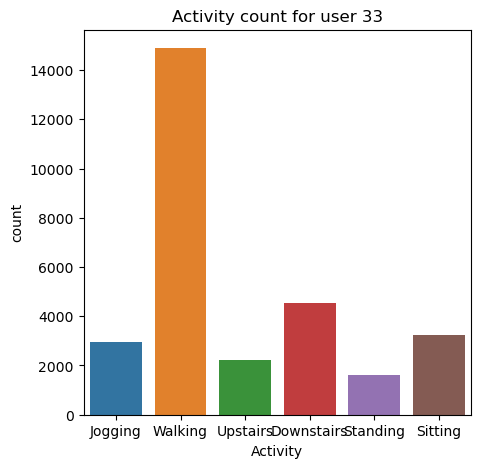

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x='activity', data=df_33, hue='activity')
plt.xlabel('Activity')
plt.title('Activity count for user 33')
plt.show()

## **Data Transformation**

In [9]:
# Window size for user data 33

x_list = []
y_list = []
z_list = []
activitylist = []

window_size = 100
step_size = 50


for i in range(0, df_33.shape[0] - window_size, step_size):
    xs = df_33['x-axis'].values[i : i + 100]
    ys = df_33['y-axis'].values[i : i + 100]
    zs = df_33['z-axis'].values[i : i + 100]
    activity_label = df_33['activity'][i : i + 100].mode()[0]
    
    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    activitylist.append(activity_label)

In [10]:
# Define an empty feature pandas data frame: 
X = pd.DataFrame()

In [11]:
def average_acc(a_list, b_list, c_list):
    average_acceleration = []
    for a, b, c in zip(a_list, b_list, c_list):
        a = np.array(a)
        b = np.array(b)
        c = np.array(c)
        # Sum of square a b and c
        sum_sqr = a**2 + b**2 + c**2
        sqrt = np.sqrt(sum_sqr)
        #average 
        mean = np.mean(sqrt)
        average_acceleration.append(mean)
    return average_acceleration
        

In [12]:
# Stat analysis
# Calculate mean: 
X['x-mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X['y-mean'] = pd.Series(y_list).apply(lambda y: y.mean())
X['z-mean'] = pd.Series(z_list).apply(lambda z: z.mean())
# Calcualte standard deviation
X['x-std'] = pd.Series(x_list).apply(lambda x: x.std())
X['y-std'] = pd.Series(y_list).apply(lambda y: y.std())
X['z-std'] = pd.Series(z_list).apply(lambda z: z.std())
# Calculate average absolute diviation : How spread out the data is
X['x-aab'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X['y-aab'] = pd.Series(y_list).apply(lambda y: np.mean(np.absolute(y - np.mean(y))))
X['z-aab'] = pd.Series(z_list).apply(lambda z: np.mean(np.absolute(z - np.mean(z))))
# min
X['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X['z_min'] = pd.Series(z_list).apply(lambda x: x.min())
# median
X['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))
# interquartile range
X['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
# positive count
X['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))
# negtive count
X['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))
# values above the mean
X['x-above-mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > np.mean(x)))
X['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))
# number of peaks
X['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))
# energy: 
X['x-energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))
average_accl_test = average_acc(x_list, y_list, z_list)
X['average accel'] = average_accl_test
# signal magnitude 
X['sma'] = pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda y: np.sum(abs(y)/100)) + pd.Series(z_list).apply(lambda z: np.sum(abs(z)/100))

In [13]:
# Capture indicies
X['x_argmax'] = pd.Series(x_list).apply(lambda x: np.argmax(x))
X['y_argmax'] = pd.Series(y_list).apply(lambda x: np.argmax(x))
X['z_argmax'] = pd.Series(z_list).apply(lambda x: np.argmax(x))

# index of min value in time domain
X['x_argmin'] = pd.Series(x_list).apply(lambda x: np.argmin(x))
X['y_argmin'] = pd.Series(y_list).apply(lambda x: np.argmin(x))
X['z_argmin'] = pd.Series(z_list).apply(lambda x: np.argmin(x))

# absolute difference between above indices
X['x_arg_diff'] = abs(X['x_argmax'] - X['x_argmin'])
X['y_arg_diff'] = abs(X['y_argmax'] - X['y_argmin'])
X['z_arg_diff'] = abs(X['z_argmax'] - X['z_argmin'])

In [75]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [16]:
target = pd.Series(activitylist)

In [17]:
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=529)

accuracy = []
for train_index, test_index in sk.split(X, target):    
    X_train = X.loc[train_index]
    y_train = target.loc[train_index]
    
    X_test = X.loc[test_index]
    y_test = target.loc[test_index]
    
    # Data standerisation
    scalar = StandardScaler()
    scalar.fit(X_train)
    X_train_data_lr = scalar.transform(X_train)
    X_test_data_lr = scalar.transform(X_test)
    
    model = LogisticRegression(random_state=21)
    model.fit(X_train_data_lr, y_train)
    prediction = model.predict(X_test_data_lr)
    model_accuracy = accuracy_score(y_test, prediction)
    accuracy.append(model_accuracy)
    

In [18]:
print(f'Average accuracy across 5 folds was: {np.mean(accuracy):0.4f}')

Average accuracy across 5 folds was: 0.9830


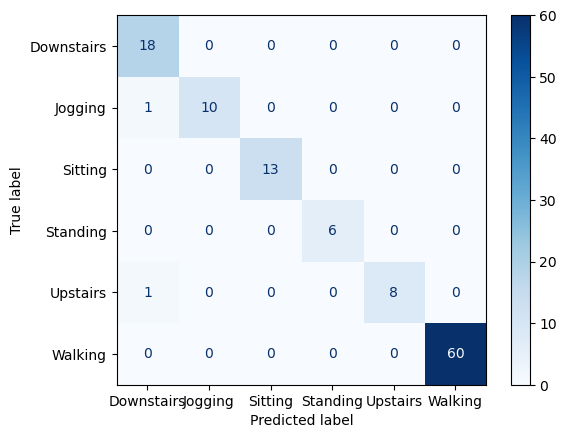

In [76]:
cm_p = confusion_matrix(y_test, prediction)
personal_disp = ConfusionMatrixDisplay(confusion_matrix=cm_p, display_labels=model.classes_)
personal_disp.plot(cmap='Blues')
plt.show()

----

In [51]:
all = pd.read_csv('alluserFeatures.csv')

In [52]:
all

,x-mean,y-mean,z-mean,x-std,y-std,z-std,x-aab,y-aab,z-aab,x_min,...,z_arg_diff,x_argmax_fft,y_argmax_fft,z_argmax_fft,x_argmin_fft,y_argmin_fft,z_argmin_fft,x_arg_diff_fft,y_arg_diff_fft,z_arg_diff_fft
0,1.325941,9.866989,0.031191,1.621340,2.591918,1.965852,1.269607,1.659634,1.288883,7.123442,...,8,1,0,4,3,24,42,2,24,38
1,2.329079,9.992704,-0.140017,2.086687,3.723214,2.664178,1.701726,3.094363,1.861259,7.273266,...,12,19,19,19,1,6,17,18,13,2
2,2.593314,9.971729,-0.143286,2.113932,3.690466,2.712587,1.778981,3.145450,1.924065,7.586533,...,36,4,0,4,3,7,11,1,7,7
3,2.700098,9.751897,-0.039090,1.966576,3.484772,2.593151,1.609773,2.956967,1.845099,7.586533,...,21,4,4,4,8,12,21,4,8,17
4,2.892008,9.750807,-0.169029,2.015529,3.375449,2.541830,1.624766,2.851284,1.723838,8.308413,...,46,4,0,4,26,47,16,22,47,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16027,8.992800,-1.008100,2.045300,0.434875,0.328976,0.362396,0.174352,0.131860,0.290216,10.880000,...,1,48,47,1,24,34,45,24,13,44
16028,9.030400,-1.105500,1.745700,0.528246,0.418223,0.433059,0.301424,0.253450,0.328812,10.880000,...,1,0,1,1,7,24,24,7,23,23
16029,8.970900,-1.232600,1.976100,0.324074,0.237473,0.448439,0.201752,0.169148,0.390280,10.080000,...,23,1,0,2,24,41,18,23,41,16
16030,8.910400,-1.236500,2.282800,0.102166,0.105151,0.080847,0.050384,0.070920,0.052456,9.470000,...,1,0,0,0,25,33,25,25,33,25


In [53]:
# Drop all fft related data:
all = all.drop(columns=all.filter(like='fft').columns)

In [55]:
all = all[X.columns]

In [64]:
all_df = pd.read_csv('df_train.csv')

In [65]:
all_activity_list = []

for i in range(0, all_df.shape[0] - window_size, step_size):
    all_activities = all_df['activity'][i : i + 100].mode()[0]
    all_activity_list.append(all_activities)


In [66]:
y_all = np.array(all_activity_list)

**The all data frame contains features of users 1 - 27.** 

## Testing model on all other users.

In [72]:
# Transform all data:
all_data_lr = scalar.transform(all)

all_prediciton = model.predict(all_data_lr)

all_accuracy = accuracy_score(y_all, all_prediciton)

In [73]:
print(f'Average accuracy against all data set for 5 folds was: {np.mean(all_accuracy):0.4f}')

Average accuracy against all data set for 5 folds was: 0.6400


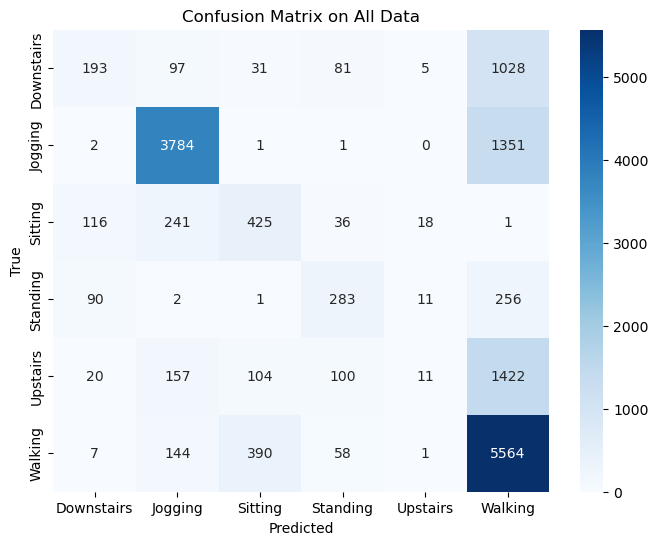

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_all, all_prediciton)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on All Data')
plt.show()

---

# Repeating With Balanced Data Set


In [9]:
df_33['activity'].value_counts()

activity
Walking       14898
Downstairs     4535
Sitting        3248
Jogging        2946
Upstairs       2214
Standing       1612
Name: count, dtype: int64